## Datos

La industria de los videojuegos esta clasificado por su genero y plataforma que lo ejecuta en donde los distribuye como  "Microsoft", "Sony" o "Nitendo".

La recopilacion de los datos estan en formato tipo CSV, en donde es el conjunto de datos con los siguientes caracteristicas:
  - `Rank`: Posicionamiento del índice que pertenece de cada elemento. 
  - `Name`: Es el nombre del videojuego.
  - `Platform`: Indica la plataforma que fue introducida y vendida el videojuego.
  - `Year`: Año que fue introducido en el mercado.
  - `Genre`: Clasificación los videojuegos basada en su jugabilidad.
  - `Publisher`:  Distribuidora de videojuegos en donde se desarrolla, promociona y comercializa.
  - `NA_Sales`: Registro de las ventas totales que no obtuvieron comecializacion.
  - `EU_Sales`: Registro de las ventas totales en la region de EU.
  - `JP_Sales`: Registro de las ventas totales en la region JP.
  - `Other_Sales`: Regitro de las ventas totales en los diferentes regiones.
  - `Global_Sales`: Registro total de las ventas a nivel internacional.

### Importación de la librerías
Implementamos lo que requerimos para realizar el análisis y exploratorio de datos tales las librerías como `pd.pandas` , `np.numpy` , `alt.altair` entre otras librerías mas que requerimos  

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import plotly.express as px
import statsmodels.api as sm

#### Lectura de datos
Para poder analisar los datos que esta compuesto nuestro archivo .csv, aplicamos la funcion `read_csv` en donde ingresamos la dirreccion del archivo o el nombre si se ubica dentro de la carpeta. 

Cuando se realize la lectura del archivo comprobemos  sus caracteristicas ultilizando las funciones de `.isnull()` para determinar los valores nulos que esta compuesto y realizar su sumatoria de todos los valores nulos con la funcion `.sum()`, todo esto lo observaremos las dimenciones con el siguiente funcion `.shape`. Para finalizar imprimimos los primeros registros para observar mas a detalle que datos estamos manejando

In [4]:
videojuegos= pd.read_csv('vgsales.csv') 
print(videojuegos.isnull().sum(), videojuegos.shape), 

display(videojuegos.head())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64 (16598, 11)


Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

##### Filtrado de datos 
Con el analisis anterior realizamos el filtrado de datos con la funcion  `.dropna()` para filtrar todos los registros que posen un valor nulo en alguno de sus campo, ya que observamos anteriormente que esta compuesto por **16598** registros y no afectaria su totalidad en eleminar un porcentaje minimo de su dataset

In [5]:
videojuegos = videojuegos.dropna()
print(videojuegos.isnull().sum(), videojuegos.shape)

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64 (16291, 11)


#### Organizacion de datos 
Con los datos ya filtrados, organizamos su estructura de los campos para una lectura menos compleja asi ordenaremos sus datos basandose del ano que esta compuesto ultilizando la funcion  `.sort_values()` y lo complementamos con `by='Year', ascending=True`  para ordenarlos de mayor a menor

Con las acciones anteriores realizalemos la eleminacion uno de los campos que esta compuesto 'Rank' ya que podemos observar que es un id de identificacion, podemos ajustarlo como el indice o eleminarlo, para fines practicos realizamos su eleminacion con la funcion `.drop()`

In [6]:
videojuegos = videojuegos.sort_values(by='Year', ascending=True)

# videojuegos = videojuegos.drop('Rank', axis=1)

videojuegos= videojuegos[['Year', 'Name', 'Platform','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
display(videojuegos.head())

Year       Name Platform    Genre   Publisher  NA_Sales  EU_Sales  \
258   1980.0  Asteroids     2600  Shooter       Atari      4.00      0.26   
6317  1980.0     Bridge     2600     Misc  Activision      0.25      0.02   
1969  1980.0   Defender     2600     Misc       Atari      0.99      0.05   
5366  1980.0    Freeway     2600   Action  Activision      0.32      0.02   
1766  1980.0    Kaboom!     2600     Misc  Activision      1.07      0.07   

      JP_Sales  Other_Sales  Global_Sales  
258        0.0         0.05          4.31  
6317       0.0         0.00          0.27  
1969       0.0         0.01          1.05  
5366       0.0         0.00          0.34  
1766       0.0         0.01          1.15

Ahora  comprobemos un analisis estadistico rapido con la funcion `.describe()`

In [7]:
videojuegos.describe()

Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000   
mean    2006.405561      0.265647      0.147731      0.078833      0.048426   
std        5.832412      0.822432      0.509303      0.311879      0.190083   
min     1980.000000      0.000000      0.000000      0.000000      0.000000   
25%     2003.000000      0.000000      0.000000      0.000000      0.000000   
50%     2007.000000      0.080000      0.020000      0.000000      0.010000   
75%     2010.000000      0.240000      0.110000      0.040000      0.040000   
max     2020.000000     41.490000     29.020000     10.220000     10.570000   

       Global_Sales  
count  16291.000000  
mean       0.540910  
std        1.567345  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.480000  
max       82.740000

Ahora que tenemos los campos organizados, se establecerá un nuevo dataset para unificar los valores de las épocas que transcurren, con el objetivo de poder plasmar en un diagrama el comportamiento de las ventas en los diferentes regiones de forma mas visual la lectura de los datos.

Para esto crearemos diferentes arreglos en donde se alamacenara los valores de los campos del dataset tales como 'global_sales', 'eu_sales', 'na_Sales', 'jp_Sales', 'other_Sales', con ello se unificaria mediante la funcion `.unique()` para unificar por el año. La clasificacion se realizara mediante un proceso de estructura ciclica  en donde vamos a interactuar con el campo **['Year']** para almacenar los datos en sus correspondientes arreglos para convertirlos en un dataset llamando la funcion `.DataFrame()` de pandas, todo esto se requiere mas adelante para graficarlo en un diagrama de correlacion


In [8]:
year= list(videojuegos.Year.unique())
global_sales=[]
eu_sales =[]
na_Sales = []
jp_Sales = []
other_Sales = []

for i in year:
    val=videojuegos[videojuegos.Year == i]
    x= val.Global_Sales.sum()
    global_sales.append(x)
    x= val.EU_Sales.sum()
    eu_sales.append(x)
    x= val.NA_Sales.sum()
    na_Sales.append(x)
    x= val.JP_Sales.sum()
    jp_Sales.append(x)
    x= val.Other_Sales.sum()
    other_Sales.append(x)
    
general_sales = pd.DataFrame({'Year':year, 
                              'Global_Sales':global_sales, 
                              'EU_Sales':eu_sales, 
                              'JP_Sales':jp_Sales,
                              'Other_Sales':other_Sales,
                              'NA_Sales':na_Sales})
display(general_sales.head())

Year  Global_Sales  EU_Sales  JP_Sales  Other_Sales  NA_Sales
0  1980.0         11.38      0.67      0.00         0.12     10.59
1  1981.0         35.77      1.96      0.00         0.32     33.40
2  1982.0         28.86      1.65      0.00         0.31     26.92
3  1983.0         16.79      0.80      8.10         0.14      7.76
4  1984.0         50.36      2.10     14.27         0.70     33.28

### Visualización
La infomracion que nos proporcionaron anteriormente podemos ahora si comprobar si es que existen una correlación entre los datos en donde ultlizaremos la liberia de **matplotlib** para graficar esta correlacion en donde ingresaremos un campo para comrpobar en este caso 'Global_Sales' 


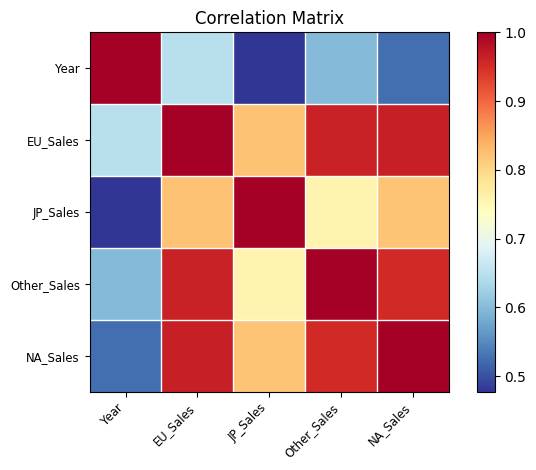

In [9]:
co = general_sales.set_index(['Global_Sales']).corr()
sm.graphics.plot_corr(co, xnames=list(co.columns))
plt.show()

Ahora que ya observamos que existen una gran correlacion entre las regiones que esta clasificado basandose de sus ventas con ello podemos vizualisar graficos simples en donde define su comportamiento
Con la informacion anterior podemos ya realizar una representacion grafica con datos generales con las ventas globales, para poder observar el comportamiento de las ventas que adquirido a traves de los años transcurido mediante la imprementacion de la liberia **altair** para plasmar una grafica de barras  

In [10]:
b1= alt.Chart(general_sales).mark_bar().encode(
    x='Year:O',
    y='Global_Sales:Q'
).interactive().properties(title="Ventas globales")
b1

alt.Chart(...)

Con esta informacion podemos percibir de forma informar el incremento de las ventas al comienzo del milenio, por lo que representaremos una grafia mas a detalle la evolucion de ventas en esta rango de la epoca, ultilizando un filtro mediante **operadores relacionales (>)** para indicar que epoca se graficara, en cual se graficara de tipo  `.mark_trail()` de la liberia **Altair** 

In [11]:
filtro = general_sales['Year'] >2000

alt.Chart(general_sales[filtro]).mark_trail().encode(
    x='Year:O',
    y='Global_Sales',
   size='Global_Sales:Q'
).interactive()

alt.Chart(...)

Ahora vizualizamos las ventas en forma mas regional, en donde podemos observar mas a detalle los puntos mas conveniente en la venta de estos productos de la industria, aplicando la liberia **Altair** para su vizualisacion en cada uno de las estadisticas regionales, ultilizando `.mark_trail()` para su comportamiento y concatenar con el metodo `.mark_point()` con ello unificamos los dos tipos de graficas en una sola, con el objetivo para analizar mas detalladamente su ventas

In [12]:
fig1 = alt.Chart(general_sales[filtro]).mark_trail().encode(
    x='Year:O',
    y='EU_Sales',
   
)
fig2 = alt.Chart(general_sales[filtro]).mark_trail().encode(
    x='Year:O',
    y='JP_Sales',
  
   color=alt.value("black")
)
fig3 = alt.Chart(general_sales[filtro]).mark_trail().encode(
    x='Year:O',
    y='Other_Sales',
   
   color=alt.value("Green")
)
fig4 = alt.Chart(general_sales[filtro]).mark_trail().encode(
    x='Year:O',
    y='NA_Sales',
   
   color=alt.value("Red"),
)

fig1 = fig1 + fig1.mark_point()
fig2 = fig2 + fig2.mark_point()
fig3 = fig3 + fig3.mark_point()
fig4 = fig4 + fig4.mark_point()
show1 = (fig3 | fig4) 
show2 = (fig1 | fig2) 
show1 & show2


alt.VConcatChart(...)

#### Tratamiento de datos
Verificaremos que consolas son las mas populares en el mercado, pero como el dataset esta compuesto por **16598** al momento de graficar nos notificara que se requiere transformar los datos ya que no puede procesar cantidades grandes, por lo que nos sugiere imprementar `alt.data_transformers.disable_max_rows()` para poder graficar sin complicaciones 

In [13]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

Ahora que nos permite graficar datos grandes si la necesidad de transformarlos, aplicaremos una grafica de barras de las ventas de videojuegos en las consolas del ultimo milenio, para verificar que consolas son las mas rentables y averiguar las razones por su comportamiento aplicando un fltro de epocas vistas anteriormente

In [14]:

filtro = videojuegos['Year'] >2000
base = alt.Chart(videojuegos[filtro]).encode(
    x='Global_Sales',
    y="Platform:O",
    text='Global_Sales'
)
base.mark_bar() 


alt.Chart(...)

Ahora que tenemos una idea mas general el comportamiento que a adquirido esta industria, verificaremos que tipo de **generos** de videojuegos a sido mas constante en el mercado ultilizando la liberia de **Altair** nuevamente para su graficas simple en donde imprementamos `.mark_bar()` para indicar el tipo de grafica y `.encode()` para ingresar los datos generales como las eje x e y.
Para cerrar la grafica aplicamos el metodo de `.interactive()` para indicar que see va ser una grafica interactiva con sus propias propiedades tales como `.properties(title="Ventas globales").add_params(brush)` 

In [15]:

brush = alt.selection_interval()

b1= alt.Chart(videojuegos).mark_bar().encode(
    x='Genre:O',
    y='Global_Sales:Q'
).interactive().properties(title="Ventas globales").add_params(brush)
b1

alt.Chart(...)

Con la informacion ya obtenida podemos realizar un analisis rapido, en cual podemos apleciar que las consolas mas popularles en el mercado "PS2", "PS3", "Xbox 360", "Wii" y "Nitendo DS". Esta informacion nos proporciona la demanda que produce en el mercado, para conocer mas a detalle que factores se requiere para obtener este impacto en estas generaciones de consolas. Ultilizaremos diferentes graficas como son de dispercion `mark_circle` para representar los generos mas populares de la consola y graficas de barras tradicional `mark_bar` para representar los videojuegos mas rentables de la consola, asi concatenar  con `.mark_text(align='left', dx=2)` para visualizar numericamente sus comportamientos 

In [16]:
# Consola Xbox 360

xbox_360 = videojuegos[(videojuegos.Platform == 'X360')]
xbox_360.Name.unique()
xbox_360.Year.unique()
# display(xbox_360.head())
# print(xbox_360.shape)

filtro = videojuegos['Global_Sales'] >6.5
fig1_xbox = alt.Chart(xbox_360).mark_circle(size=60).encode(
    x='Year:O',
    y='Global_Sales:Q',
    color='Genre',
    tooltip=['Name', 'Genre', 'Year', 'Global_Sales']
).interactive().properties(title="Tipo de genero mas popular Xbox 360")

fig2_xbox = alt.Chart(xbox_360[filtro]).encode(
    x='Global_Sales',
    y="Name",
    text='Global_Sales'
).interactive().properties(title="Juegos mas popular Xbox 360")
fig2_xbox = fig2_xbox.mark_bar() + fig2_xbox.mark_text(align='left', dx=2)

# Consola PS 2

PS2 = videojuegos[(videojuegos.Platform == 'PS3')]
PS2.Name.unique()
PS2.Year.unique()

fig1_ps2 = alt.Chart(PS2).mark_circle(size=60).encode(
    x='Year:O',
    y='Global_Sales:Q',
    color='Genre',
    tooltip=['Name', 'Genre', 'Year', 'Global_Sales']
).interactive().properties(title="Tipo de genero mas popular PS2")

fig2_ps2 = alt.Chart(PS2[filtro]).encode(
    x='Global_Sales',
    y="Name",
    text='Global_Sales'
).interactive().properties(title="Juegos mas popular PS2")
fig2_ps2 = fig2_ps2.mark_bar() + fig2_ps2.mark_text(align='left', dx=2)

# Consola Wii

wii = videojuegos[(videojuegos.Platform == 'Wii')]
wii.Name.unique()
wii.Year.unique()


fig1_wii = alt.Chart(wii).mark_circle(size=60).encode(
    x='Year:O',
    y='Global_Sales:Q',
    color='Genre',
    tooltip=['Name', 'Genre', 'Year', 'Global_Sales']
).interactive().properties(title="Tipo de genero mas popular Wii")

fig2_wii = alt.Chart(wii[filtro]).encode(
    x='Global_Sales',
    y="Name",
    text='Global_Sales'
).interactive().properties(title="Juegos mas popular Wii")
fig2_wii = fig2_wii.mark_bar() + fig2_wii.mark_text(align='left', dx=2)
show1 = (fig1_xbox | fig2_xbox)
show2 = (fig1_ps2 | fig2_ps2)
show3 = (fig1_wii | fig2_wii)
show1 & show2 & show3

C:\Users\DELL\AppData\Local\Temp\ipykernel_4720\3243173664.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fig2_xbox = alt.Chart(xbox_360[filtro]).encode(
C:\Users\DELL\AppData\Local\Temp\ipykernel_4720\3243173664.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fig2_ps2 = alt.Chart(PS2[filtro]).encode(
C:\Users\DELL\AppData\Local\Temp\ipykernel_4720\3243173664.py:58: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fig2_wii = alt.Chart(wii[filtro]).encode(


alt.VConcatChart(...)

Ahora solo requerimos un nuevo dataset para realizar las comparaciones de la competencia rival de la empresa Microsoft que es la **PS4** ,en donde realizaremos un filtrado de informacion que unicamente el nuevo dataset estara compuesto de plataformas **PS4** y **Xbox-One** ultilizando por operadores relacionales y imprimimos sus resultados con el metodo `head`

In [17]:
comparison = videojuegos[(videojuegos.Platform == 'PS4') | (videojuegos.Platform == 'XOne')] 
comparison.Name.unique()
comparison.head()

Year                   Name Platform    Genre        Publisher  \
7292  2013.0            NBA Live 14      PS4   Sports  Electronic Arts   
856   2013.0          Battlefield 4     XOne  Shooter  Electronic Arts   
909   2013.0  Need for Speed Rivals      PS4   Racing  Electronic Arts   
493   2013.0                FIFA 14      PS4   Sports  Electronic Arts   
505   2013.0   Call of Duty: Ghosts     XOne  Shooter       Activision   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
7292      0.14      0.05      0.00         0.03          0.22  
856       1.25      0.58      0.00         0.16          1.98  
909       0.73      0.91      0.03         0.22          1.89  
493       0.61      1.85      0.11         0.33          2.90  
505       1.87      0.77      0.00         0.22          2.86

Ahora que tenemos los datos ya filtrados de la compañia que estas haciendo su analisis y su competencia directa, aplicaremos una comparacion de graficas simples con la liberia **Altair**, con el conjunto de metodos de `.mark_bar()` para indicar el tipo de grafica y `.interactive().properties(title=)` para indicar que funcion va adquirir y que titulo va adoptar 

In [18]:
fig = alt.Chart(comparison).mark_bar().encode(
    x="Year:N",
    y="Global_Sales:Q",
    xOffset="Platform:N",
    color="Platform:N"
).interactive().properties(title="Ventas mundiales entre PS4 y XOne")

fig1 = alt.Chart(comparison).mark_bar().encode(
    x="Genre:N",
    y="Global_Sales:Q",
    xOffset="Platform:N",
    color="Platform:N"
).interactive().properties(title="Generos mas populares entre PS4 y XOne")
show = (fig | fig1)
show

alt.HConcatChart(...)

Ahora que tenemos una idea mas visual del mercado entre estas compañias, consultaremos los datos numericos para una mayor complementacion del analisis, en donde podemos observar que la compañia competidora, a tenido un mejor rendimiento que la compañia estamos trabajando
Para poder observar los resultados llamamos el dataset que vamos a extraer en este caso **comparsion** y ingresamos los campos a extraer `[['NA_Sales','EU_Sales','JP_Sales','Global_Sales','Platform','Year']] ` y lo agrupamos dependiendo de las necesidades en este caso los campos  `['Year','Platform'] ` con el metodo `.groupby()`  y lo promediamos con la funcion `mean()` 

In [35]:
ho = comparison[['NA_Sales','EU_Sales','JP_Sales','Global_Sales','Platform','Year']].groupby(['Year','Platform']).mean()
ho

NA_Sales  EU_Sales  JP_Sales  Global_Sales
Year   Platform                                            
2013.0 PS4       0.630625  0.686875  0.058125      1.547500
       XOne      0.621053  0.278421  0.001053      0.978947
2014.0 PS4       0.454533  0.597333  0.038933      1.316800
       XOne      0.498525  0.290984  0.002295      0.859508
2015.0 PS4       0.297518  0.368102  0.045182      0.841606
       XOne      0.434051  0.227595  0.002152      0.729873
2016.0 PS4       0.110841  0.163364  0.039533      0.366822
       XOne      0.123889  0.085741  0.000185      0.229074
2017.0 PS4       0.000000  0.000000  0.030000      0.030000

Clasificaremos en diferentes dataset dependiendo de la consola **X-One** y **PS4** en donde alamcenaremos los campos de las ventas regionales y su epoca vendida

In [20]:
Xone = videojuegos[(videojuegos.Platform == 'XOne')]
Xone.Year.unique()
Xone

year= list(Xone.Year.unique())
global_sales=[]
eu_sales =[]
na_Sales = []
jp_Sales = []
other_Sales = []

for i in year:
    val=Xone[Xone.Year == i]
    x= val.Global_Sales.sum()
    global_sales.append(x)
    x= val.EU_Sales.sum()
    eu_sales.append(x)
    x= val.NA_Sales.sum()
    na_Sales.append(x)
    x= val.JP_Sales.sum()
    jp_Sales.append(x)
    x= val.Other_Sales.sum()
    other_Sales.append(x)
    
Xone = pd.DataFrame({'Year':year, 
                              'Global_Sales':global_sales, 
                              'EU_Sales':eu_sales, 
                              'JP_Sales':jp_Sales,
                              'Other_Sales':other_Sales,
                              'NA_Sales':na_Sales})
display(Xone.head())


ps4 = videojuegos[(videojuegos.Platform == 'PS4')]
ps4

year= list(ps4.Year.unique())
global_sales=[]
eu_sales =[]
na_Sales = []
jp_Sales = []
other_Sales = []

for i in year:
    val=ps4[ps4.Year == i]
    x= val.Global_Sales.sum()
    global_sales.append(x)
    x= val.EU_Sales.sum()
    eu_sales.append(x)
    x= val.NA_Sales.sum()
    na_Sales.append(x)
    x= val.JP_Sales.sum()
    jp_Sales.append(x)
    x= val.Other_Sales.sum()
    other_Sales.append(x)
    
ps4 = pd.DataFrame({'Year':year, 
                              'Global_Sales':global_sales, 
                              'EU_Sales':eu_sales, 
                              'JP_Sales':jp_Sales,
                              'Other_Sales':other_Sales,
                              'NA_Sales':na_Sales})
display(ps4.head())

Year  Global_Sales  EU_Sales  JP_Sales  Other_Sales  NA_Sales
0  2013.0         18.60      5.29      0.02         1.50     11.80
1  2014.0         52.43     17.75      0.14         4.14     30.41
2  2015.0         57.66     17.98      0.17         5.23     34.29
3  2016.0         12.37      4.63      0.01         1.05      6.69

Year  Global_Sales  EU_Sales  JP_Sales  Other_Sales  NA_Sales
0  2013.0         24.76     10.99      0.93         2.75     10.09
1  2014.0         98.76     44.80      2.92        17.02     34.09
2  2015.0        115.30     50.43      6.19        17.86     40.76
3  2016.0         39.25     17.48      4.23         5.73     11.86
4  2017.0          0.03      0.00      0.03         0.00      0.00

Por ultimo realizaremos la ultima graficas para la visualizacion de las ventas en los diferentes regiones de estas compañias, en donde se aplicara una grafica de **Altair** con la funcion de `.mark_line()` para indicar que esta grafica lineal, esto estara ingresado en un metodo llamado `do_local()` en donde pasaremos los siguientes parametros `(plattafrom, eje_y, eje_x, color)` en donde se ingresaran en los campos que se requiere de la grafica con el objetivo de reciclar el codigo simplificando su eficiencia 

In [21]:
def do_local(plattafrom, eje_y, eje_x, color):
    x= alt.Chart(plattafrom).mark_line(
    point=alt.OverlayMarkDef(filled=False, fill="white")
    ).encode(
    x=eje_x,
    y=eje_y,
    color=alt.value(color),
    )
    x.encoding.x.title = "Year"
    x.encoding.y.title = "Ventas de las regiones"
    return x


llamamos el metodo `do_local` en donde ingresaremos los parametros correspondientes, y finalizamos con una concatenacion de los diferentes metodos invocados para conjuntar todas las ventas de las regiones en una sola grafica

In [22]:
x1= do_local(Xone,'EU_Sales','Year:Q',"Green")
x2= do_local(Xone,'NA_Sales','Year:Q',"Blue")
x3= do_local(Xone,'JP_Sales','Year:Q',"Red")
x4= do_local(Xone,'Other_Sales','Year:Q',"Black")
x = x2+x1+x3+x4.interactive().properties(title="Comportamiento de las ventas en Xbox-One")

p1= do_local(ps4,'EU_Sales','Year:Q',"Green")
p2= do_local(ps4,'NA_Sales','Year:Q',"Blue")
p3= do_local(ps4,'JP_Sales','Year:Q',"Red")
p4= do_local(ps4,'Other_Sales','Year:Q',"Black")
p = p2+p1+p3+p4.interactive().properties(title="Comportamiento de las ventas en PS4")

x | p

alt.HConcatChart(...)

#### scikit-learn 
Ahora para finalizar implementamos un modelo de aprendizaje ultilizando la liberia `scikit-learn` para predecir los posibles valores para la consola que esta trabajando

In [23]:
Xone = videojuegos[(videojuegos.Platform == 'XOne')]
x = Xone['Global_Sales']
y = Xone['NA_Sales']
x

856      1.98
505      2.86
4408     0.45
748      2.18
731      2.21
         ... 
5015     0.38
2991     0.68
3145     0.64
16222    0.01
15720    0.02
Name: Global_Sales, Length: 213, dtype: float64

Para una representacion grafica del comportamiento, debemos de realizar un filtrado de informacion, en donde unicamente estara compuesto por datos de X-One, con ello imprementaremos 2 variables que almacenara con los siguientes valores:
* `x = Xone['Global_Sales']`
* `y = Xone['NA_Sales']`

Con ello podemos complementarlo con una grafica de `matplotlib` en donde se pasara sus parametros las variables ya explicadas

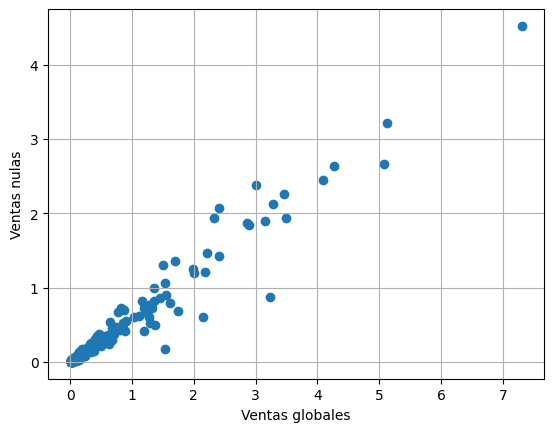

In [36]:
Xone = videojuegos[(videojuegos.Platform == 'XOne')]
x = Xone['Global_Sales']
y = Xone['NA_Sales']

plt.scatter(x,y)
plt.xlabel("Ventas globales")
plt.ylabel("Ventas nulas")
plt.grid()
plt.show()

Ahora que tenemos una idea mas general de la grafica de dispercion, realizaremos un modelo de prediccion, para conocer que productos van a tener un mejor impacto y cuales no 

Con ello importamos las liberias `sklearn` y declaramos una variables con el nombre de `clf` que es un nombre tipoco para estas situaciones en donde se almacenara un objeto de tipo `LinearRegression()`

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
clf = LinearRegression()

Ahora que se requiere es entrenar el modelo, en donde indicamos la variable `clf` que se entrene con el metodo `fit()` en donde pasamos los argumentos de las variables `x , y` en donde indicamos que la variable `x` se transforme con el metodo de numpy `.array.reshape(-1, 1)`

In [26]:
clf.fit(x.array.reshape(-1, 1),y)

LinearRegression()

Con ello solamente requerimos conocer los valores independiente y dependiente  para el modelo, en donde se aplicara el metodo `coef_` en la variable `clf` para concer el valor **B0** o valor independiente y el metodo `intercept_` para conocer el valor **B1** o valor dependiente

In [42]:
a= clf.coef_
b = clf.intercept_
print(a)
print(b)

[0.6008982]
-0.007383568064334933


Estos valores podemos ultilizar para pronosticar valores ya que los metodos `coef_` y `clf.intercept_` nos proporcionaron los datos requeridos, entoces con el metodo `predict` nos retorna un valor aproximado dependiendo de los parametros que tenemos en nuestro dataset

In [45]:
clf.predict([[3]])

array([1.79531103])

In [31]:
predicciones = clf.predict(x.array.reshape(-1, 1))

Con la infomracion anterior podemos graficar los posibles datos pronosticados ya imprementados anteriormente, en donde se aplicara una grafica de dispercion ultilizando `matplotlib` en donde ingresamos los parametros de sus ejes correspondientes en este caso el eje x va tener los valores originales y el eje y que es la variable `predicciones` va simular las predicciones

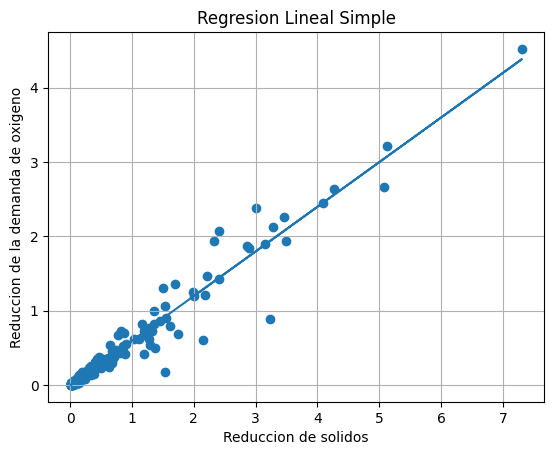

In [32]:
plt.scatter(x,y)
plt.plot(x, predicciones)
plt.title("Regresion Lineal Simple")
plt.xlabel("Reduccion de solidos")
plt.ylabel("Reduccion de la demanda de oxigeno")
plt.grid()
plt.show()

En conclucion su solucion consiste con el siguiente resutado 

In [33]:
mean_squared_error(y, predicciones)

0.0217829237210531